In [10]:
import numpy as np
import struct
import sys
sys.path.insert(0, '../../Machine_Learning')
from atlas_ml import *
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [11]:
def flatten_imgs(X):
    n_img = np.shape(X)[0]
    h = np.shape(X)[1]
    w = np.shape(X)[2]
    size_arr = h*w
    return np.reshape(X,(n_img,size_arr))

def read_idx(filename):
    with open(filename, 'rb') as f:
        zero, data_type, dims = struct.unpack('>HBB', f.read(4))
        shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
        return np.frombuffer(f.read(), dtype=np.uint8).reshape(shape)

In [12]:
''' CHANGE PATH IN THE BELOW LINE ACCORDING TO YOUR DIRECTORY STRUCTURE'''
X = read_idx('data/Fashion_MNIST/train/train-images-idx3-ubyte')
X = flatten_imgs(X)
X = normalize(X)               # Try without this
X = np.transpose(X)

''' CHANGE PATH IN THE BELOW LINE ACCORDING TO YOUR DIRECTORY STRUCTURE'''
Y = read_idx('data/Fashion_MNIST/train/train-labels-idx1-ubyte')
Y = np.expand_dims(Y, axis=1)
Y = np.transpose(Y)
Y = one_hot(Y,10)

''' CHANGE PATH IN THE BELOW LINE ACCORDING TO YOUR DIRECTORY STRUCTURE'''
X_test = read_idx('data/Fashion_MNIST/test/t10k-images-idx3-ubyte')
X_test = flatten_imgs(X_test)
X_test = normalize(X_test)     # Try without this
X_test = np.transpose(X_test)

''' CHANGE PATH IN THE BELOW LINE ACCORDING TO YOUR DIRECTORY STRUCTURE'''
Y_test = read_idx('data/Fashion_MNIST/test/t10k-labels-idx1-ubyte')
Y_test = np.expand_dims(Y_test, axis=1)
Y_test = np.transpose(Y_test)
Y_test = one_hot(Y_test,10)

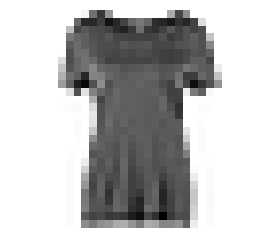

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [15]:
i = 10
plt.imshow(X[:,i].reshape(28,28), cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()
print(Y[:,i])

In [5]:
class MNIST_net:
    def __init__(self, X_size, Y_size, lossfn):
        self.L1 = layer(X_size, 150, relu)
        self.L2 = layer(150, 50, relu)        
        self.L3 = layer(50, Y_size, softmax)
        self.lossfn = lossfn()
        
    def f_pass(self, X):
        A1 = self.L1.forward(X)
        A2 = self.L2.forward(A1)
        A3 = self.L3.forward(A2)
        self.H = A3
        return self.H
    
    def back_prop(self,X,Y, batch_size, reg_lamda):
        m = batch_size
        
        self.loss = self.lossfn.get_loss(self.H,Y)
        dL_dZ = self.lossfn.diff(self.H,Y)
        
        self.L3.out_grad(dL_dZ, self.L2.A, m, reg_lamda)
        self.L2.grad(self.L3.dZ, self.L3.W, self.L1.A, m, reg_lamda)
        self.L1.grad(self.L2.dZ, self.L2.W, X, m, reg_lamda)
    
    def optim(self, lr, beta):
        self.L1.step(lr, beta)
        self.L2.step(lr, beta)
        self.L3.step(lr, beta)

In [6]:
n_in = np.shape(X)[0]
n_out = np.shape(Y)[0]

#We create a fresh object of MNIST_net
mnist_net = MNIST_net(n_in,n_out,CE_loss)

In [7]:
#Hyperparameters feel free to tweak these!

#batch_size
#lies in [1,X.shape[1]], preferably powers of 2
# 1 -> stochastic descent
# X.shape[1] -> batch descent
batch_size = 16

#learning rate
lr = 0.01

n_epochs = 20

#learning rate decay parameter, lies in [0,1]
lr_decay = 1

beta = 0.99

reg_lambda = 0.1

epoch:20/20 | Loss:0.0625 |             Train Accuracy: 0.8193 | Test_Accuracy:0.8091


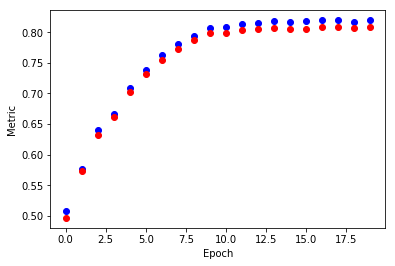

In [8]:
train(mnist_net, X, Y, X_test, Y_test, model_accuracy, n_epochs,batch_size, lr, lr_decay, beta, reg_lambda)